In [81]:
import numpy as np
import tensorflow as tf
from keras.datasets import reuters
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from keras.utils.np_utils import to_categorical

In [82]:
#Load in preprocessed trainging and test data
(trainData, trainLabels), (testData, testLabels) = reuters.load_data(num_words = 10000)

#Test print
print(len(trainData))
print(len(testData))
print(len(testLabels))
print(len(trainLabels))

8982
2246
2246
8982


In [83]:
#Vectorize training and label data as tensors
def vectorizeInput(sequences, ndmin=10000):
    results = np.zeros((len(sequences), ndmin))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results



xTrain = vectorizeInput(trainData)
xTest = vectorizeInput(testData)
yTrain = to_categorical(trainLabels)
yTest = to_categorical(testLabels)

In [84]:
#Init the model, 64 layer dense models with softmax activation to measure the proposed / true probability distribution
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [85]:
#Train model 
xVal = xTrain[:1000]
partialXTrain = xTrain[1000:]

yVal = yTrain[:1000]
partialYTrain = yTrain[1000:]

history2 = model.fit(partialXTrain, partialYTrain, epochs=20, batch_size=512, validation_data=(xVal, yVal))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.9218 - accuracy: 0.4404 - val_loss: 1.9905 - val_accuracy: 0.6040
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.6244 - accuracy: 0.6684 - val_loss: 1.4218 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.2149 - accuracy: 0.7349 - val_loss: 1.2107 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9903 - accuracy: 0.7869 - val_loss: 1.0884 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8253 - accuracy: 0.8201 - val_loss: 1.0156 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6841 - accuracy: 0.8528 - val_loss: 0.9728 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5801 - accuracy: 0.8750 - val_loss: 0.9283 - val_accuracy: 0.7960
Epoch 8/20
16

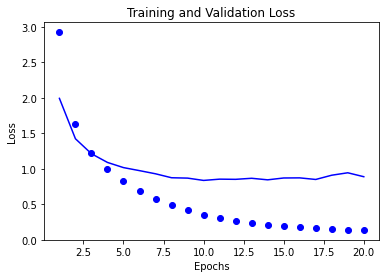

In [86]:
#Import matplotlib for data visualization
import matplotlib.pyplot as plt

loss = history2.history['loss']
valLoss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, valLoss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Model begins to overfit data after ~8 or 9 epochs

In [87]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(partialXTrain, partialYTrain, epochs=9, batch_size=512, validation_data=(xVal, yVal))
results = model.evaluate(xTest)

Epoch 1/9
16/16 [==============================] - 1s 32ms/step - loss: 2.7898 - accuracy: 0.4994 - val_loss: 1.8796 - val_accuracy: 0.6140
Epoch 2/9
16/16 [==============================] - 0s 21ms/step - loss: 1.5593 - accuracy: 0.6785 - val_loss: 1.4138 - val_accuracy: 0.6840
Epoch 3/9
16/16 [==============================] - 0s 21ms/step - loss: 1.2048 - accuracy: 0.7414 - val_loss: 1.2679 - val_accuracy: 0.7260
Epoch 4/9
16/16 [==============================] - 0s 23ms/step - loss: 0.9964 - accuracy: 0.7885 - val_loss: 1.1317 - val_accuracy: 0.7500
Epoch 5/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8398 - accuracy: 0.8170 - val_loss: 1.0454 - val_accuracy: 0.7700
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.7037 - accuracy: 0.8439 - val_loss: 1.0022 - val_accuracy: 0.7760
Epoch 7/9
16/16 [==============================] - 0s 21ms/step - loss: 0.5960 - accuracy: 0.8666 - val_loss: 0.9612 - val_accuracy: 0.7820
Epoch 8/9
16/16 [===

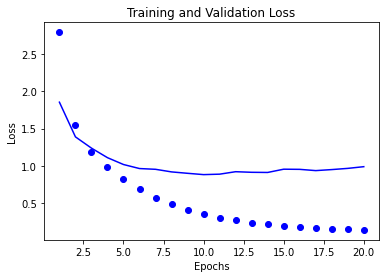

In [88]:
loss = history.history['loss']
valLoss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, valLoss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()